In [63]:
import pickle
from scipy.spatial import distance
from time import time
import numpy as np
import os
import imageio
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
with open("../data/LFW_DATA.pickle", "rb") as f:
    lfw = pickle.load(f)

In [36]:
lfw["database_identity"]

array([[array(['Aaron_Eckhart\\Aaron_Eckhart_0001.jpg'], dtype='<U36')],
       [array(['Aaron_Guiel\\Aaron_Guiel_0001.jpg'], dtype='<U32')],
       [array(['Aaron_Patterson\\Aaron_Patterson_0001.jpg'], dtype='<U40')],
       ...,
       [array(['Zumrati_Juma\\Zumrati_Juma_0001.jpg'], dtype='<U34')],
       [array(['Zurab_Tsereteli\\Zurab_Tsereteli_0001.jpg'], dtype='<U40')],
       [array(['Zydrunas_Ilgauskas\\Zydrunas_Ilgauskas_0001.jpg'], dtype='<U46')]],
      dtype=object)

In [6]:
print("data_feature shape:",lfw["database_feature"].shape)

data_feature shape (13113, 4720)


In [26]:
def l2_distance1(a, b):
    dst = distance.euclidean(a,b)
    return dst

def l2_distance2(a, b):
    dist = np.linalg.norm(a-b)
    return dist

In [29]:
a = lfw["database_feature"][0]
b = lfw["database_feature"][1]
start_time = time()
for i in range(100000):
    l2_distance1(a,b)
end_time = time()
end_time - start_time

4.82162618637085

In [30]:
start_time = time()
for i in range(100000):
    l2_distance2(a,b)
end_time = time()
end_time - start_time

2.0545341968536377

numpy function is faster than scipy for computing l2 distance

In [49]:
def search(query_feature,database_feature, identity):
    distance_list = []
    a = query_feature
    for b in database_feature:
        distance_list.append(l2_distance2(a, b))
    sortIndexByDist = np.argsort(np.array(distance_list))
    return identity[sortIndexByDist]

In [88]:
query_index = 0
query_feature = lfw["query_feature"][query_index]
query_identity = lfw["query_identity"][query_index]
print("query image:",query_identity)
database_feature = lfw["database_feature"]
identity = lfw["database_identity"]
response = search(query_feature, database_feature, identity)

query image: [array(['Ariel_Sharon\\Ariel_Sharon_0001.jpg'], dtype='<U34')]


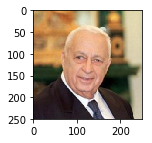

In [89]:
def show_image(identity):
    file_name = identity[0][0].replace("\\","/")
    image_dir = "../data/lfw_image/"
    image_path = os.path.join(image_dir,file_name)
    query_image = imageio.imread(image_path)
    plt.figure(figsize=(2,2))
    plt.imshow(query_image)
    plt.show()

show_image(query_identity)

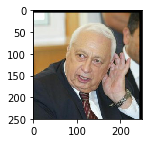

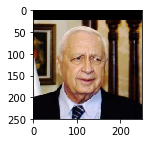

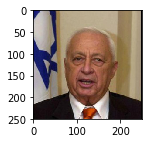

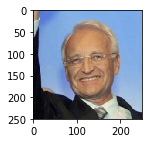

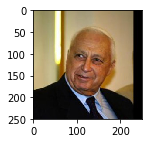

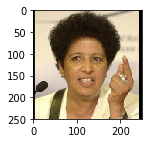

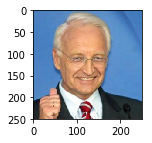

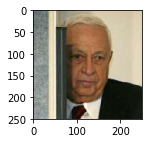

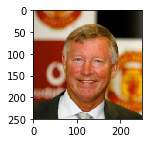

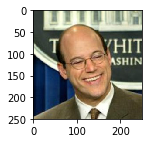

In [90]:
# show top 10 retrival results
for _id in response[:10]:
    show_image(_id)

# Performance evaluation

In [129]:
# calculate MAPdef p(k, query_identity, response):
    # precision at k
    query_name = query_identity[0][0].split("\\")[0]
    retrieved_name = np.array([response[i][0][0].split("\\")[0] for i in range(len(response))])
    correct = sum(query_name==retrieved_name[:k])
    return correct/k

def AveP(query_identity, response, identity):
    # aompute average precision
    query_name = query_identity[0][0].split("\\")[0]
    database_name = np.array([identity[i][0][0].split("\\")[0] for i in range(len(identity))])
    retrieved_name = np.array([response[i][0][0].split("\\")[0] for i in range(len(response))])
    number_of_relevance = sum(query_name == database_name)
    print("number of relevance ",number_of_relevance)
    numerator = []
    for k in range(number_of_relevance):
        if retrieved_name[k] == query_name:
            rel = 1
        else:
            rel = 0
        score = p(k+1,query_identity,response)*rel
        numerator.append(score)
    return sum(numerator)/number_of_relevance

In [132]:
print("P@10:",p(10, query_identity=query_identity, response=response))

P@10: 0.5


In [133]:
print("mean average precision:", AveP(query_identity, response, identity))

67
mean average precision: 0.11332243086046395
